In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
artists = pd.read_csv('assets/artists.csv')
works = pd.read_csv('assets/artworks.csv')
df = pd.read_csv("museums.csv")

/Users/melissangamini/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (9,14,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Narrative Analytics Guided Example

Here we're going to dive into a dataset and perform some analytics, The Museum of Modern Art ([MoMA](https://www.moma.org/)) acquired its first artworks in 1929, the year it was established. Today, the Museum’s evolving collection contains almost 200,000 works from around the world spanning the last 150 years. Also note that data and guided example makes a decent example for your capstone report.


# The Museum of Modern Art Collection Data Exploration

## Data

We will be working with the Museum of [Modern Art Collection](https://www.kaggle.com/datasets/momanyc/museum-collection?select=artworks.csv) dataset of artists and artworks. This data was released by the MoMa. 

For our purposes we are going to assume that it is representative of their larger collection and that it is also therefore representative of the MoMa's art collecting in general post 1200 (the earliest acquisition in this dataset was acquired in 1216).

The dataset itself consists of 2 tables, artists and artworks. 

The artists dataset contains 15,091 records, representing all the artists who have work in MoMA's collection and have been cataloged in our database. It includes basic metadata for each artist, including name, nationality, gender, birth year, and death year.

The artworks dataset contains 130,262 records, representing all of the works that have been accessioned into MoMA’s collection and cataloged in our database. It includes basic metadata for each work, including title, artist, date, medium, dimensions, and date acquired by the Museum. Some of these records have incomplete information and are noted as “not curator approved.”

## Analytic Questions

__ #1 Who are the most popular artists in the MoMa Collection? Are there any outliers in terms of amount collected?__

Let's start with a simple question about popularity. Which artists and time periods has the MoMa prioritized collecting? First we'll approach artists.

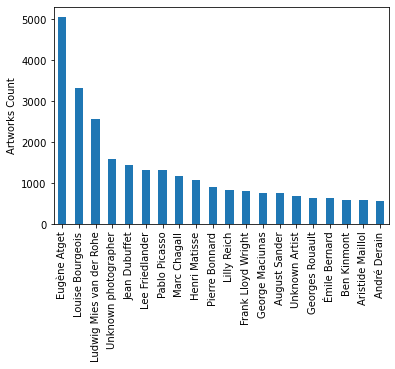

In [3]:
works.Name.value_counts().head(20).plot(kind='bar')
plt.ylabel('Artworks Count')
plt.show()

This plot of artworks by artists for the top 20 artists really only shows us one thing (other than providing a list of the 20 most popular artists): The MoMa has a lot of works by Eugène Atget.

Eugène Atget was a French flâneur and a pioneer of documentary photography, noted for his determination to document all of the architecture and street scenes of Paris before their disappearance to modernization. Most of his photographs were first published by Berenice Abbott after his death. It makes up a large portion of the MoMa's museum in New York.

To look at the relative popularity of other artists let's remove Eugène Atget.

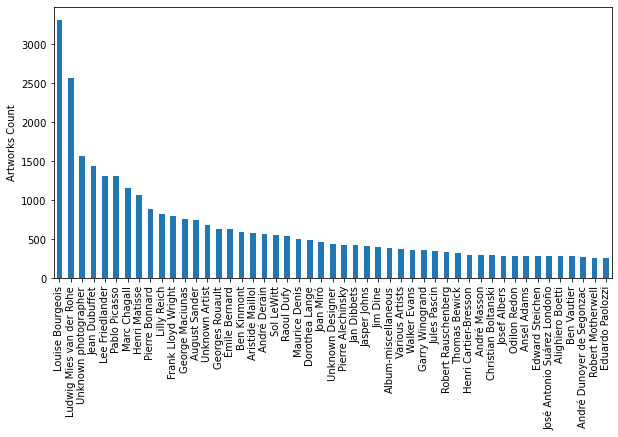

In [4]:
works.Name.value_counts().head(50)[1:51].plot(kind='bar', figsize=(10,5))
plt.ylabel('Artworks Count')
plt.show()

So there seem to be a few other exceptionally popular artists, with the first four or arguably six being collected in meaningfully larger numbers. 

_Remember, this is popularity in terms of pieces collected. We have no data about visits or webviews._

__ #2 Who are the artists in the MoMa's collection? How does that vary by geography, age, and living or dead?__ 

So there are 15,091 artists in the MoMa's collection. Where are they from? When looking into the `placeOfBirth` variable, there is a challenge, however. The format is inconsistent. Sometimes the birthplace includes a city, others just a country.

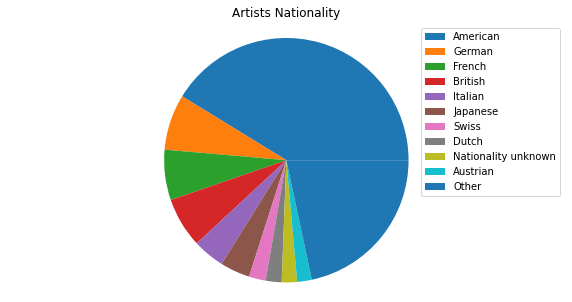

In [5]:
# Process data to create counts by country

# Split the Nationality on commas in case there is two of them
locations = artists.Nationality.str.split(',', 1).tolist()
locations = [x for x in locations if str(x) != 'nan']
nationalities = []

# Process countries and clean up text
for entry in locations:
    c = entry[-1]
    c = c.strip()
    nationalities.append(c)
nationalities = pd.DataFrame(nationalities, columns=['nationality'])

# Create numeric counts
cntry_counts = pd.DataFrame(nationalities.nationality.value_counts())
other = int(cntry_counts[10:].sum())
cntry_counts = cntry_counts[:10]
cntry_counts.loc[11] = other
cntry_counts = cntry_counts.rename(index={11: 'Other'})

# Generate Pie Chart
plt.figure(figsize=(10, 5))
plt.pie(cntry_counts.nationality)
plt.axis('equal')
plt.title('Artists Nationality')
plt.legend(cntry_counts.index)
plt.show()

So, about half of the artists in the collection are from the US, which again is not hugely surprising as this is a American collection. The two things of note we see here are that the Japan is the only Asian country in the top 10. Also, the other countries selection is quite large, with a very large number of countries having some representation in the MoMa collection and making up more than a quarter of their collection.

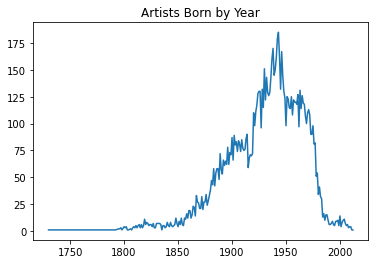

In [6]:
plt.plot(artists['Birth Year'].value_counts().sort_index())
plt.title('Artists Born by Year')
plt.show()

You can see that the closer to modern times we get, the more artists we have represented. You see some interesting peaks around the centuries that are perhaps worthy of further investigation. Maybe they're using something other than artist's names to talk about movements?

How does this compare to when artworks were acquired?

In [7]:
# Split the 'Acquisition Date' on "-" 
works['acquisitionYear']= works['Acquisition Date'].str.split('-', 1).str[:1]

In [8]:
works['acquisitionYear'] = works['acquisitionYear'].str[0]#.fillna(0).astype(int)

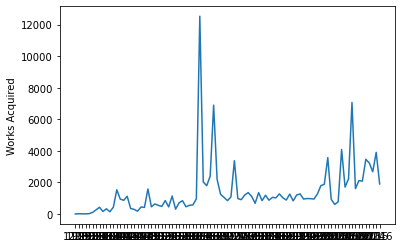

In [9]:
acquisition_df = pd.DataFrame(works.acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')
plt.show()

This shows a collection that seems to have several peaks in its growth. That is consistent with how museum collections tend to grow. While there is some steady acquisition, which is somewhat visible in the more modern years (though this is not a great visual of that), museums tend to see the majority of their growth from large gifts or bequests.  What does it look like without Eugène Atget and to see the years clearly?

In [10]:
#convert to integer
works['acquisitionYear']= works['acquisitionYear'].fillna(0).astype(int)

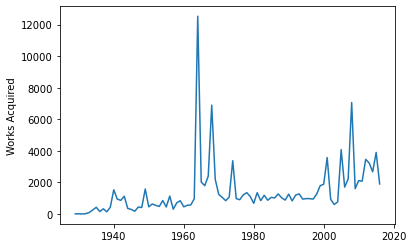

In [11]:
plt.plot(works[works['acquisitionYear']>=1900].acquisitionYear.value_counts().sort_index(), label='Works Acquired')
plt.ylabel('Works Acquired')
plt.show()

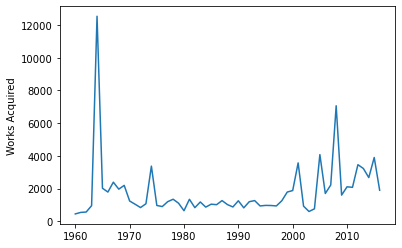

In [12]:
acquisition_df = pd.DataFrame(works[(works.acquisitionYear>=1960) & (works.Name != 'Eugène Atget')].acquisitionYear.value_counts())
acquisition_df = acquisition_df.sort_index()
plt.plot(acquisition_df)
plt.ylabel('Works Acquired')
plt.show()

This shows a few more clear spikes but also a clear narrative that the collection has been growing more rapidly in recent years. This aligns with the skew towards contemporary artists.

Let's move on to one last subject: determining the portion of the artists who are living. For this, we'll use year of death as an indicator. 

Text(0.5, 1.0, 'Artists Who are No Longer Living')

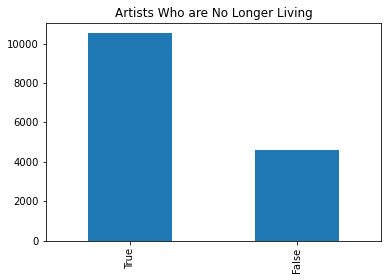

In [13]:
living = pd.DataFrame(artists['Death Year'].isnull())
living = pd.DataFrame(living['Death Year'].value_counts())
living.plot(kind='bar', legend=False)
plt.title('Artists Who are No Longer Living')

This shows a surprisingly large portion of the artists collected by the MoMa are dead.

__#3 What are the most popular mediums and how does medium affect size?__

So it would be tempting to start with medium just as the data provides it. However, this reveals a bit of a problem.

In [14]:
works.Medium.value_counts().head(10)

Gelatin silver print            14103
Lithograph                       7034
Albumen silver print             4845
Lithograph, printed in color     1833
Pencil on paper                  1725
Etching                          1710
Lithograph, printed in black     1523
Chromogenic color print          1488
Letterpress                      1420
Ink on paper                     1388
Name: Medium, dtype: int64

There are way too many kinds of medium, and with a level of subtlety that we don't really want. We'll group some together.

We're also dropping Turner here because he has 25,000 works on paper that skew all counts towards that.

In [15]:
# Remove Atget
Atgetless_artworks = works[works['Name'] != 'Eugène Atget']
# Coerce to Numeric
Atgetless_artworks['Height (cm)'] = pd.to_numeric(Atgetless_artworks['Height (cm)'], errors = 'coerce')
Atgetless_artworks['Width (cm)'] = pd.to_numeric(Atgetless_artworks['Width (cm)'], errors = 'coerce')
Atgetless_artworks['Depth (cm)'] = pd.to_numeric(Atgetless_artworks['Depth (cm)'], errors = 'coerce')
#Atgetless_artworks = Atgetless_artworks[Atgetless_artworks['units']=='mm']
Atgetless_artworks = Atgetless_artworks[Atgetless_artworks['Height (cm)'].notnull()]

## The error is just because of how we did the conditional select and we don't need to be worried about it...

<ipython-input-15-d5a3676e5e2f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Atgetless_artworks['Height (cm)'] = pd.to_numeric(Atgetless_artworks['Height (cm)'], errors = 'coerce')
<ipython-input-15-d5a3676e5e2f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Atgetless_artworks['Width (cm)'] = pd.to_numeric(Atgetless_artworks['Width (cm)'], errors = 'coerce')
<ipython-input-15-d5a3676e5e2f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [16]:
# Aggregate to new medium_agg column
Atgetless_artworks['Medium_agg'] = 'other'
Atgetless_artworks.loc[Atgetless_artworks['Medium'].str.contains("paper", na=False),'medium_agg'] = 'paper'
Atgetless_artworks.loc[Atgetless_artworks['Medium'].str.contains("canvas", na=False),'medium_agg'] = 'canvas'
Atgetless_artworks.loc[Atgetless_artworks['Medium'].str.contains("wood", na=False),'medium_agg'] = 'wood'
Atgetless_artworks.loc[Atgetless_artworks['Medium'].str.contains("paint on", na=False),'medium_agg'] = 'other painted panel'
Atgetless_artworks.loc[Atgetless_artworks['Medium'].str.contains("Bronze", na=False),'medium_agg'] = 'sculpture'
Atgetless_artworks.loc[Atgetless_artworks['Medium'].str.contains("Plaster", na=False),'medium_agg'] = 'sculpture'
Atgetless_artworks.loc[Atgetless_artworks['Medium'].str.contains("Marble", na=False),'medium_agg'] = 'sculpture'
Atgetless_artworks.loc[Atgetless_artworks['Medium'].str.contains("Stone", na=False),'medium_agg'] = 'sculpture'
Atgetless_artworks.loc[Atgetless_artworks['Medium'].str.contains("plate", na=False),'medium_agg'] = 'plate'
Atgetless_artworks.loc[Atgetless_artworks['Medium'].str.contains("photograph", na=False),'medium_agg'] = 'photo'

Atgetless_artworks['surface'] = Atgetless_artworks['Height (cm)'] * Atgetless_artworks['Width (cm)']

In [17]:
Atgetless_artworks[['medium_agg','Height (cm)','Width (cm)','Depth (cm)','surface']].groupby('medium_agg').describe()

Height (cm)                                         \
                          count        mean        std  min        25%   
medium_agg                                                               
canvas                   1514.0  123.470422  71.618001  0.0  66.000000   
other painted panel       697.0  101.209968  91.651788  0.0  35.300000   
paper                   15857.0   41.615416  34.466611  0.0  21.844000   
photo                     413.0   40.454158  41.544112  0.0  20.320041   
plate                     552.0   48.005541  49.968616  0.0  18.800000   
sculpture                 357.0   75.446040  73.252889  0.0  27.900000   
wood                     2716.0   48.533109  55.363788  0.0  17.275000   

                                                   Width (cm)              \
                        50%        75%         max      count        mean   
medium_agg                                                                  
canvas               102.95  175.40000   404.80000     1512.0  126.367180   
other painted panel   65.70  152.40000  1011.00000      695.0  115.379738   
paper                 31.80   50.80000  1097.30000    15837.0   46.692194   
photo                 28.00   46.00000   320.04064      412.0   51.836890   
plate                 30.25   70.87695   411.50000      493.0   60.527188   
sculpture             47.30  101.60000   450.00000      318.0   64.475169   
wood                  30.80   59.62500   609.60120     2656.0   47.971016   

                     ... Depth (cm)             surface                \
                     ...        75%        max    count          mean   
medium_agg           ...                                                
canvas               ...     8.8250  405.13081   1512.0  20638.171154   
other painted panel  ...    13.7500  853.40000    695.0  19775.385281   
paper                ...     1.3000  270.00000  15837.0   3612.820589   
photo                ...     3.8000  525.80000    412.0   4196.429937   
plate                ...    59.0000  331.50000    493.0   7584.738616   
sculpture            ...    50.2738  632.00000    318.0   8627.599149   
wood                 ...    61.0000  602.00000   2656.0   4508.015499   

                                                                   \
                              std  min          25%           50%   
medium_agg                                                          
canvas               31832.318664  0.0  4524.600000  10273.820000   
other painted panel  37725.898869  0.0  1238.511587   5080.655323   
paper                80291.968266  0.0   578.250000   1013.100000   
photo                14717.697146  0.0   511.704610    868.242606   
plate                57272.208274  0.0   273.480000    881.640000   
sculpture            22451.864289  0.0   735.052500   1931.044998   
wood                 14071.093825  0.0   309.678039    800.203213   

                                                 
                              75%           max  
medium_agg                                       
canvas               27726.070000  7.989722e+05  
other painted panel  19935.297239  3.597624e+05  
paper                 2903.231613  1.003371e+07  
photo                 2097.175000  1.982007e+05  
plate                 3967.741620  1.066067e+06  
sculpture             6906.170000  2.214105e+05  
wood                  3548.391938  2.589072e+05  

[7 rows x 32 columns]

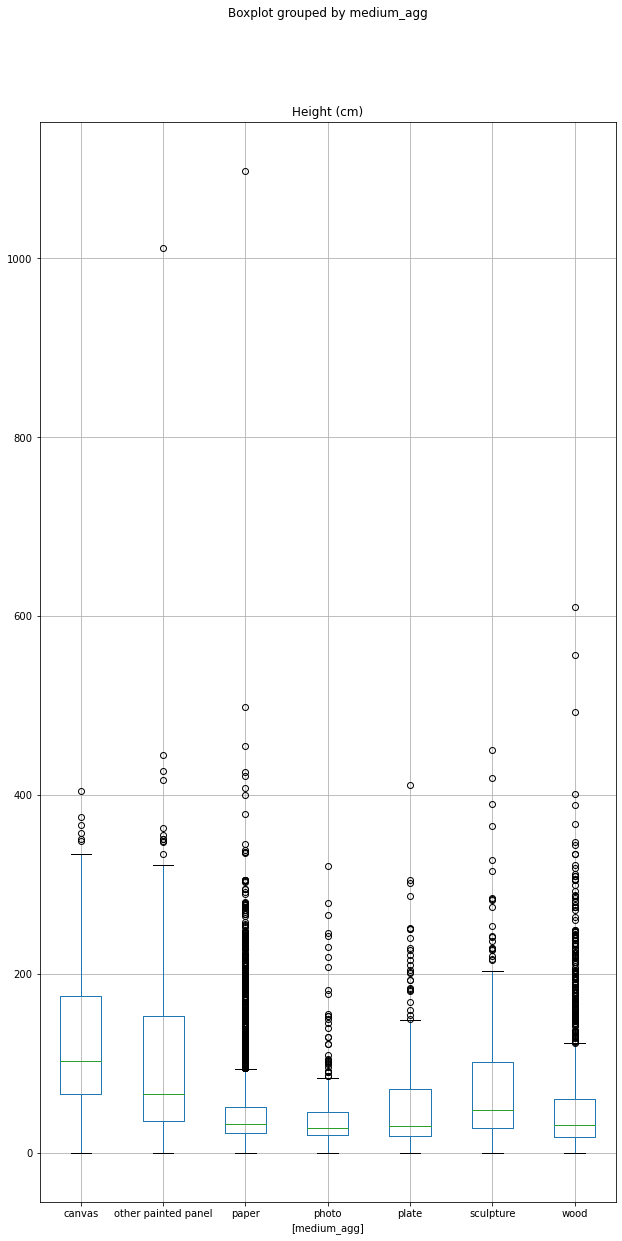

In [18]:
Atgetless_artworks[['medium_agg', 'Height (cm)']].boxplot(by='medium_agg', figsize=(10,20))
plt.show()

In [19]:
Atgetless_artworks[Atgetless_artworks['Height (cm)']>1400]

,Artwork ID,Title,Artist ID,Name,Date,Medium,Dimensions,Acquisition Date,Credit,Catalogue,...,Height (cm),Length (cm),Width (cm),Depth (cm),Weight (kg),Duration (s),acquisitionYear,Medium_agg,medium_agg,surface
87538,101902,To Lift,5349,Richard Serra,1967,Vulcanized rubber,"36"" x 6' 8"" x 60"" (91.4 x 200 x 152.4 cm)",2007-10-01,Gift of the artist,Y,...,9140.000000,NaN,200.000000,152.4003,NaN,NaN,2007,other,NaN,1.828000e+06
91942,111576,Vitra Wallpaper,"31022, 31023, 33830","Michael Rock, Susan Sellers, Georgianna Stout",2002,Digital print from Adobe Illustrator File,"620 x 163"" (1574.8 x 414 cm)",2007-11-07,Gift of the designers,Y,...,1574.803100,NaN,414.020800,NaN,NaN,NaN,2007,other,NaN,6.520012e+05
112975,163921,11,37833,Mariah Robertson,2012,Chromogenic color print,"100' x 30"" (3048 x 76.2 cm)",2012-10-02,Acquired through the generosity of Thomas and ...,Y,...,3048.006096,NaN,76.200152,NaN,NaN,NaN,2012,other,NaN,2.322585e+05


Now, that plot is so ghastly large that it's likely impossible to see all of it on a monitor at once. However, keeping it makes a point. There are some _exceptional_ outliers here. The most striking is a paper piece by Richard Serra measuring 91.4 meters high! We only included one of the plots, but it would be trivial to generate the same boxplot for width, depth, and surface area. 

__Do that and give me the outliers you found__

However, the bottom part of the plot has more generally applicable conclusions to show. Plates are almost all the same size (this is things like copper plates by the way, not ceramic). Canvas is the largest in medium and 75th percentile, and therefore also the highest whisker.

So as one would expect different mediums are generally different sizes but there is huge variation in the collection, so trying to predict medium off of size could be very difficult.